### MARKET STUDY OF COMMERCIAL ESTABLISHMENTS IN L.A.

It is desired to develop a market study on commercial establishments in L.A., California, USA, to determine the existing conditions in the market in order to attract possible investors when opening a new coffee business in the area.

The data is essentially concentrated in a single dataset that collects information pertaining to different types of establishments, namely: restaurants, bakeries, cafes and fast food establishments. Information was provided on the type of establishment, the number of existing seats, the address where it is located, the name of the place and whether or not it belongs to a commercial chain (CC). The dataset contains 9651 records.

The main objective of this market study is to determine the preliminary conditions of the current situation existing in the target area in order to evaluate the possibilities of opening a new coffee trading establishment in the area.

## Initialization

In [100]:
# Load libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re

from importlib import reload
plt=reload(plt)

In [246]:
# Loading libraries

df_restaurants_us = pd.read_csv('rest_data_us.csv',  sep=',')

## Initial exploration

## Dataset

In [102]:
df_restaurants_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [103]:
df_restaurants_us.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [104]:
df_restaurants_us.shape

(9651, 6)

In [105]:
df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [106]:
df_restaurants_us.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


## Data Cleaning and Preparation

### Check for duplicate values

In [107]:
df_restaurants_us.duplicated().sum()

0

### Check for missing values

In [108]:
df_restaurants_us.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [109]:
df_restaurants_us[df_restaurants_us['chain'].isna() == True].count()

id             3
object_name    3
address        3
chain          0
object_type    3
number         3
dtype: int64

In [110]:
# Deleting the NaNs rows in column chain
df_restaurants_us = df_restaurants_us.dropna(subset=['chain'])

In [111]:
df_restaurants_us.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [112]:
df_restaurants_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


## Conclusion of the data cleaning and preparation part

1- The dataset was reviewed and found the following situation:

-there is 1 feature (chain) with a type of information designated as Object that could be of another, more appropriate type.

-there is 1 feature (object_type) designated as Object that should be of categorical type

-the presence of missing values was detected in the chain column

Corresponding actions taken:

1- The 'chain' column was converted to the boolean type, which is considered more appropriate due to the type of information it contains.

2- The object_type column was converted to the category type, which is considered to be more appropriate due to the type of information it contains.

3- The presence of missing data in the feature 'chain' was identified, which was corrected, applying their elimination, since there are only 3 rows, and they do not represent a significant amount of data in the dataset, and they barely represent is 0.03% of the total data.

4- No problems were found in the names of the features, that is, all the names are written in a homogeneous way.

5- The non-existence of duplicate values in the data was verified.

6- It was also noted that there are extreme values, which could indicate the presence of outliers or atypical values in the data.

# Data analysis (EDA)

In [113]:
df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [114]:
df_restaurants_us['id'].count()

9648

In [115]:
df_restaurants_us['number'].mean()

43.70356550580431

In [116]:
# Total seats by type of establishment
df_order_products_result = df_restaurants_us.groupby(['object_type'])['number'].sum().reset_index()
df_order_products_result

,object_type,number
0,Bakery,6162
1,Bar,13072
2,Cafe,10875
3,Fast Food,33939
4,Pizza,9106
5,Restaurant,348498


In [117]:
df_filtered = df_restaurants_us.groupby(['object_type'])['id'].count().reset_index()
listaad=df_filtered['object_type']
listaad

0        Bakery
1           Bar
2          Cafe
3     Fast Food
4         Pizza
5    Restaurant
Name: object_type, dtype: object

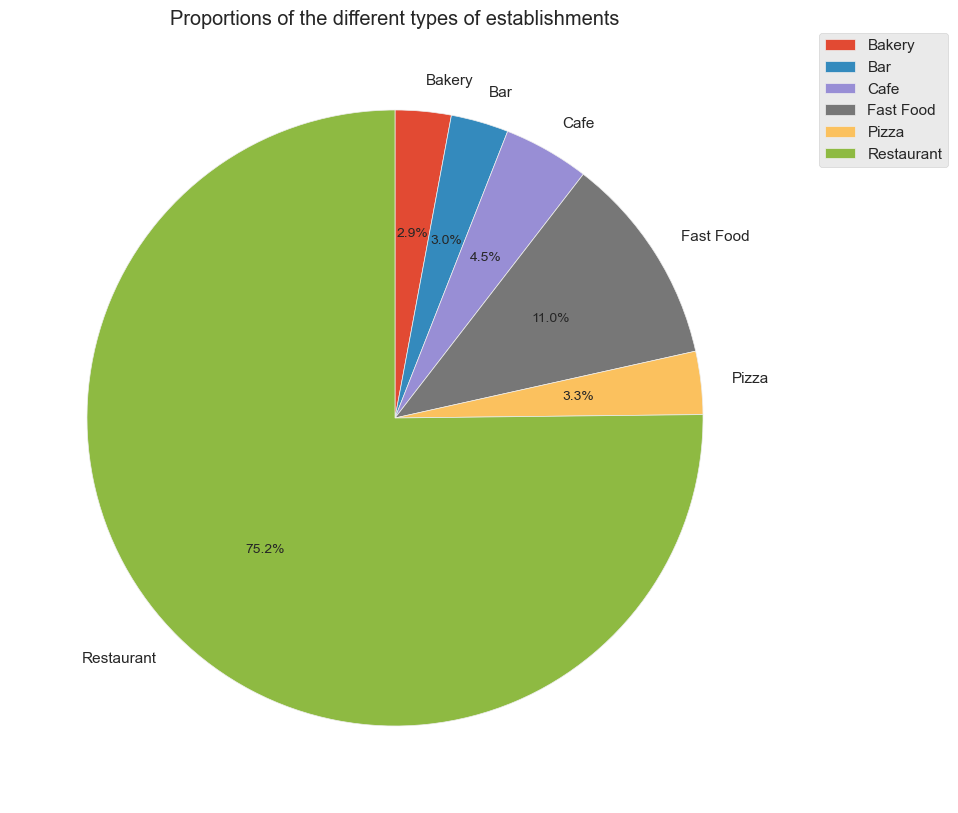

In [118]:
# Chart to investigate the proportions of the different types of establishments.
# The pie chart type is considered suitable for visualizing or representing proportions

plt.style.use('ggplot')
fig, ax1=plt.subplots(1,1,figsize=(10,10))
labels = ['Bakery',  'Bar',  'Cafe' , 'Fast Food' , 'Pizza' , 'Restaurant']
ax1.pie(df_filtered['id'], labels=labels, autopct='%1.1f%%',counterclock=False,startangle=90)
ax1.set(title='Proportions of the different types of establishments')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.figure.savefig('pie_chart_okey.png')
plt.show()

In [119]:
df_filtered = df_restaurants_us.groupby(['chain'])['id'].count().reset_index()
df_filtered

,chain,id
0,False,5972
1,True,3676


From the previous graph it can be seen that the largest proportion corresponds to Restaurant type establishments.

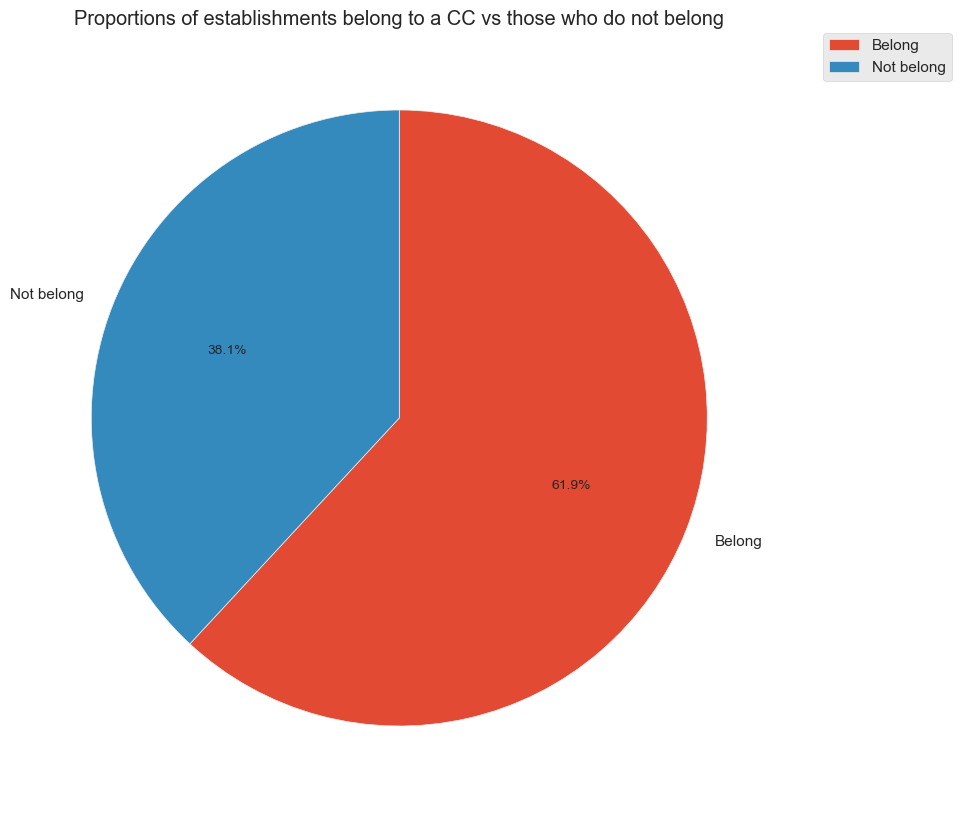

In [120]:
#Graph to investigate the proportions of establishments that belong to a chain and those that do not.

plt.style.use('ggplot')
fig, ax1=plt.subplots(1,1,figsize=(10,10))
labels =  ['Belong', 'Not belong']
ax1.pie(df_filtered['id'], labels=labels, autopct='%1.1f%%',counterclock=False,startangle=90)
ax1.set(title='Proportions of establishments belong to a CC vs those who do not belong')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
ax1.figure.savefig('Piechart_proportions_establishments_belong_to_a_CC_okey.png')

From the previous graph, it can be seen that establishments that do not belong to a commercial chain predominate.

In [121]:
df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [122]:
df_filtered = pd.DataFrame()
df_filtered = df_restaurants_us.groupby(['object_type','chain'])['id'].count().reset_index()
df_filtered

,object_type,chain,id
0,Bakery,True,283
1,Bar,False,215
2,Bar,True,77
3,Cafe,False,169
4,Cafe,True,266
5,Fast Food,False,461
6,Fast Food,True,605
7,Pizza,False,166
8,Pizza,True,153
9,Restaurant,False,4961


In [123]:
lab= df_filtered['id']

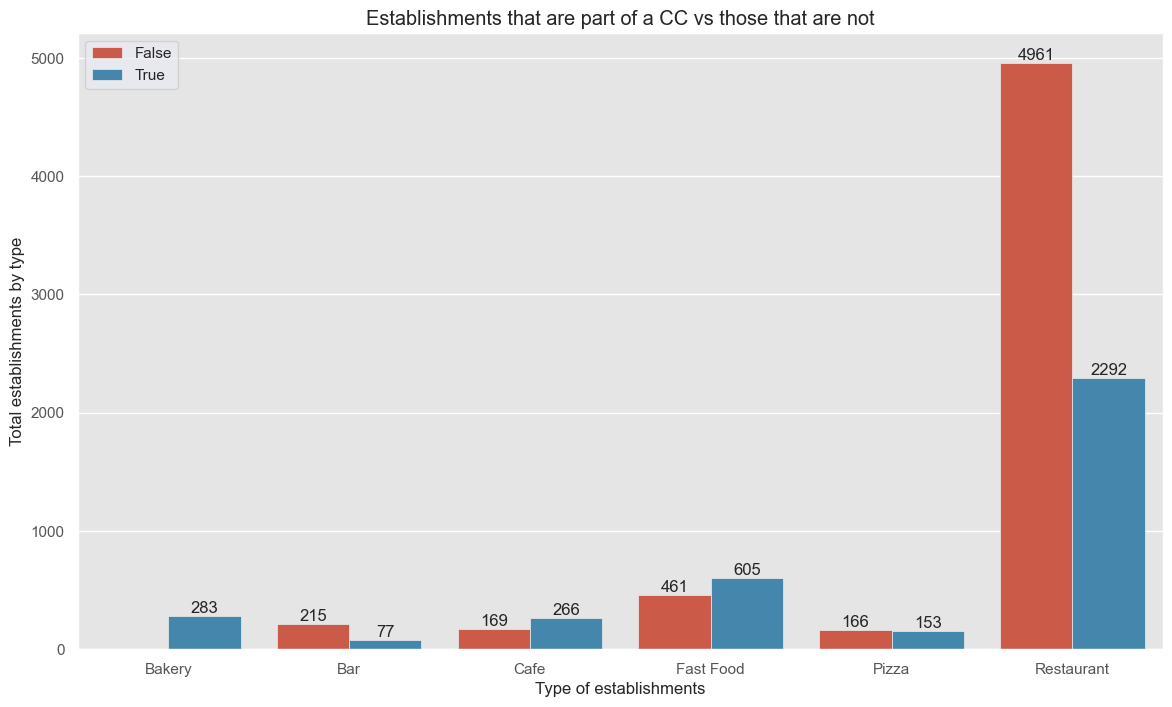

In [124]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_filtered,x='object_type', y= 'id', hue = 'chain')
ax.set(title='Establishments that are part of a CC vs those that are not')
ax.set_xlabel("Type of establishments",fontsize=12)
ax.set_ylabel("Total establishments by type",fontsize=12)
sns.set(rc={'figure.figsize':(14,8)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper left')
lab=[283 ,215, 77, 169,  266,  461,  605,  166, 153, 4961, 2292]
for i in ax.containers:
    ax.bar_label(i,)
ax.figure.savefig('barplot_establishments_okey.png')

In [125]:
df_filteredd = df_filtered.drop('chain', axis=1)
df_filteredd

,object_type,id
0,Bakery,283
1,Bar,215
2,Bar,77
3,Cafe,169
4,Cafe,266
5,Fast Food,461
6,Fast Food,605
7,Pizza,166
8,Pizza,153
9,Restaurant,4961


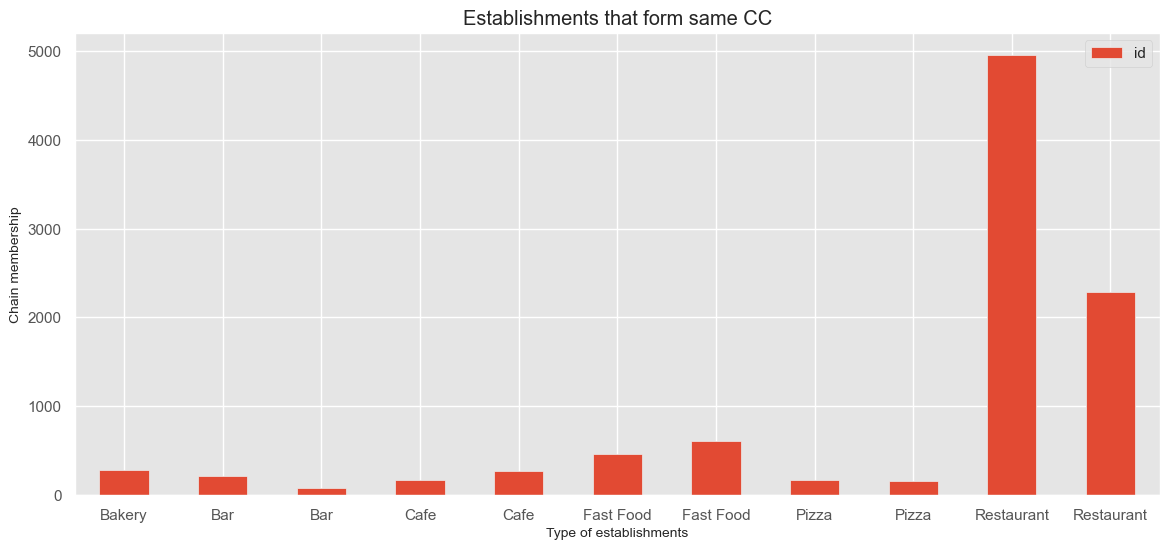

In [126]:
plt.style.use('ggplot')
df_filtered.plot(x='object_type', y='id', kind='bar',rot= 0, title='Establishments that form same CC', ylabel='Chain membership', xlabel='Type of establishments', figsize=(14, 6))
plt.savefig('barplot_establishments_of_same_chain.png')

In [127]:
df_filt = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False)
df_filt['places_in_chain'] = df_restaurants_us[mis_booleans].groupby(['object_type'])['id'].count()
df_filt

,places_in_chain
object_type,
Bar,215
Cafe,169
Fast Food,461
Pizza,166
Restaurant,4961


From the previous graph, it is observed that restaurants are those establishments that predominate among those that do not belong to a commercial chain with 4,961 units.

In [128]:
df_filtered3 = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True)
df_filtered3['places_in_chain'] = df_restaurants_us[mis_booleans].groupby(['object_type'])['id'].count()
df_filtered3

,places_in_chain
object_type,
Bakery,283
Bar,77
Cafe,266
Fast Food,605
Pizza,153
Restaurant,2292


In [129]:
df_filtered3['places_in_chain'].sum()

3676

In [130]:
df_filtered3.columns

Index(['places_in_chain'], dtype='object')

In [131]:
new_value = 2292 / 3676
new_value = new_value*100
new_value

62.35038084874864

In [132]:
# Obtaining the part represented by the Restaurants that belong to commercial chains of the grand total

new_valueglobal = 2292 / 9648
new_valueglobal = new_valueglobal*100
new_valueglobal

23.756218905472636

Of the group of types of establishments that belong to commercial chains, the Restaurant type, with 2,292 units, corresponds to 62.3% of the total, however, of the grand total of establishments they represent 23.7%

In [133]:
# Characterization of chains: many establishments with a small number of seats or a few establishments with
# plenty of seats

df_new = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True)
df_new = df_restaurants_us[mis_booleans].groupby('object_type')['number'].sum().reset_index()
df_new

,object_type,number
0,Bakery,6162
1,Bar,3100
2,Cafe,6894
3,Fast Food,23044
4,Pizza,3906
5,Restaurant,102810


In [134]:
df_new['object_type'].unique()

array(['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant'],
      dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


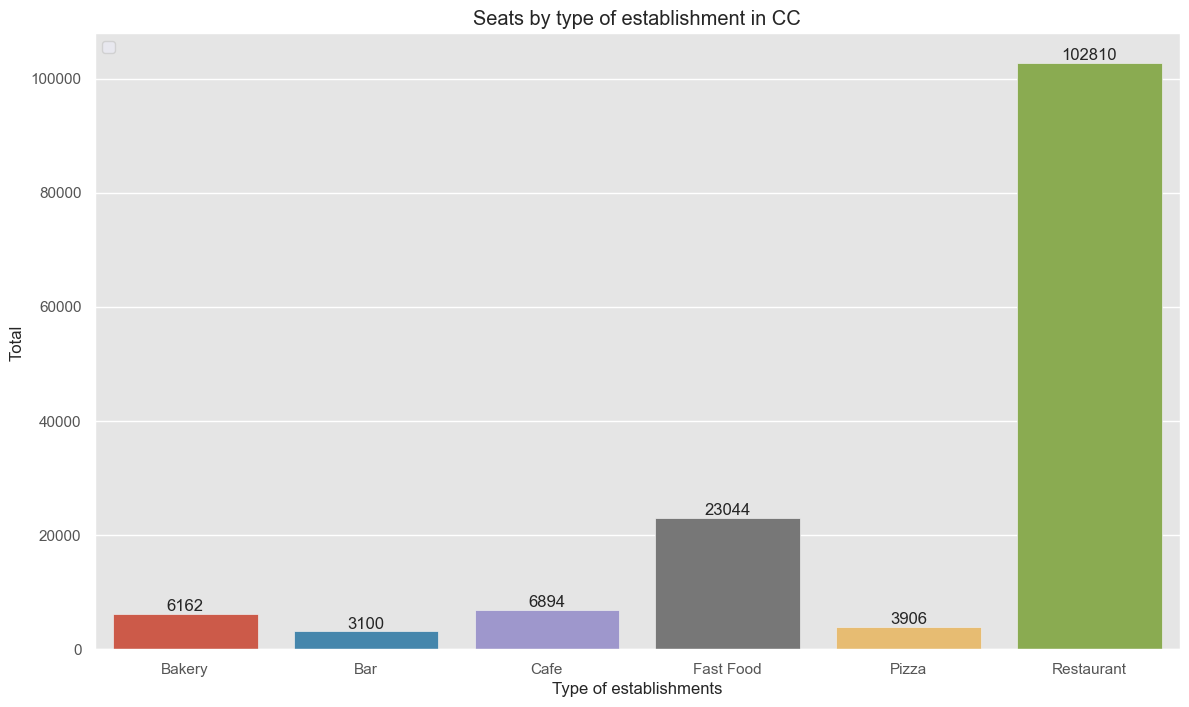

In [135]:
plt.style.use('ggplot')

ax = sns.barplot(data = df_new, x='object_type', y= 'number')
ax.set(title='Seats by type of establishment in CC')
ax.set_xlabel("Type of establishments",fontsize=12)
ax.set_ylabel("Total ",fontsize=12)
sns.set(rc={'figure.figsize':(14,8)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper left')
lab=[283 ,215, 77, 169,  266,  461,  605,  166, 153, 4961, 2292]
for i in ax.containers:
    ax.bar_label(i,)
ax.figure.savefig('Seats_by_type_establishment_in_chain3.png')

In [138]:
df_neww = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False)

df_neww = df_restaurants_us[mis_booleans].groupby('object_type')['number'].sum().reset_index()
df_neww

,object_type,number
0,Bar,9972
1,Cafe,3981
2,Fast Food,10895
3,Pizza,5200
4,Restaurant,245688


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


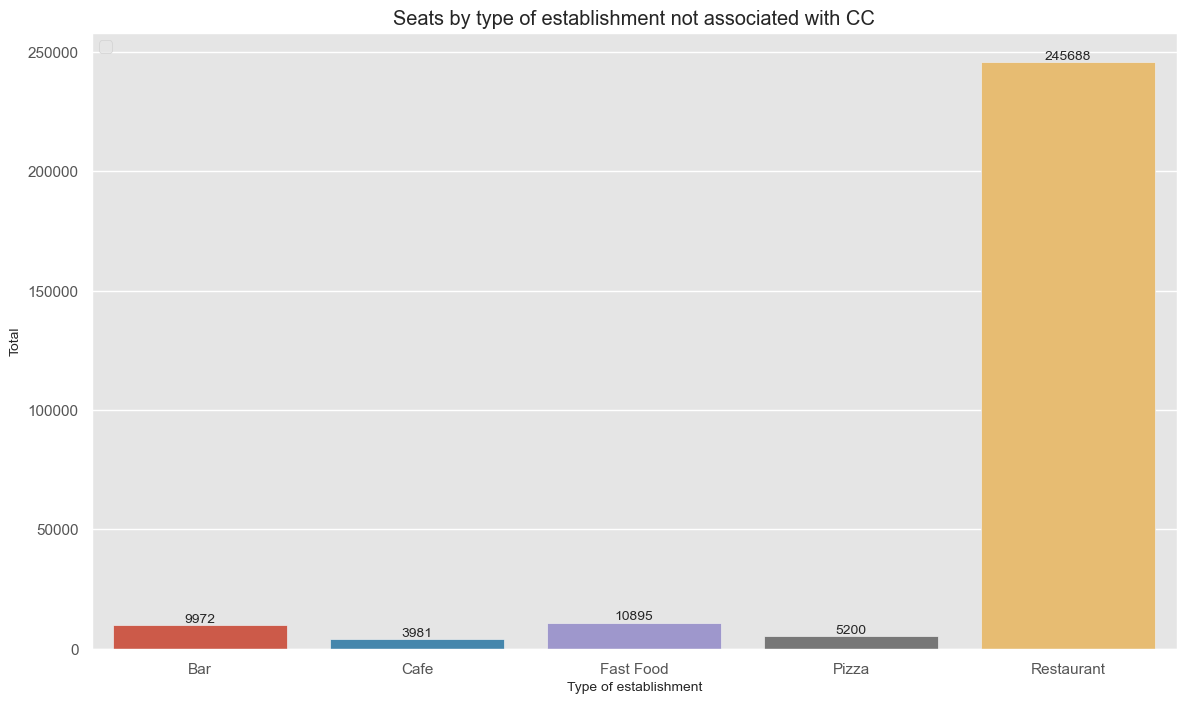

In [139]:
# Seating chart in non-affiliated establishments

plt.style.use('ggplot')
ax = sns.barplot(data = df_neww, x='object_type', y= 'number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Type of establishment")
ax.set_ylabel("Total")
plt.title("Seats by type of establishment not associated with CC") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')
ax.bar_label(ax.containers[0], labels=df_neww['number'])

plt.show()
ax.figure.savefig('Seats_by_type_establishment_not_associated_chain1.png')

In [140]:
df_aparte = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True)
df_aparte = df_restaurants_us[mis_booleans] 
df_aparte

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [141]:
df_aparte['number'].mean()

39.69423286180631

In [142]:
#A classification was adopted to better illustrate the differences in the number of seats:
#  -an establishment with up to 10 seats is small,
#  -an establishment with between 10 to 30 seats is medium,
#  -an establishment with more than 30 seats is classified as a large establishment

data_query1 = df_aparte[(df_aparte['number'] <= 10)]
data_query1

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
35,11821,REGGIE'S DELI & CAFE,1910 W SUNSET BLVD STE 150,True,Restaurant,1
58,11844,BASE COAT -JUICE BAR,704 MATEO ST,True,Bar,2
82,11868,SUBWAY #39685,704 W 1ST ST,True,Fast Food,3
97,11883,K-BAKERY,1258 W TEMPLE ST,True,Bakery,6
...,...,...,...,...,...,...
9584,21370,IVAN'S RESTAURANT,1811 W 7TH ST,True,Restaurant,10
9590,21376,PIRATES MEXICAN FOOD,8511 S BROADWAY,True,Restaurant,5
9608,21394,GO GET EM TIGER,230 N LARCHMONT BLVD,True,Restaurant,5
9627,21413,PIZZA BUONA,922 N ALAVARADO ST STE C,True,Pizza,5


In [143]:
df_new_intermedio1 = pd.DataFrame()
df_new_intermedio1['num'] = data_query1.groupby('object_type')['number'].count() 
df_new_intermedio1.mean()

num    117.666667
dtype: float64

In [144]:
df_new_intermedio11 = pd.DataFrame()
df_new_intermedio11['num'] = data_query1.groupby('object_type')['number'].sum() 
df_new_intermedio11.mean() # 627 average number of seats

num    627.833333
dtype: float64

In [145]:
df_new_intermedio11.reset_index()

,object_type,num
0,Bakery,441
1,Bar,69
2,Cafe,328
3,Fast Food,655
4,Pizza,234
5,Restaurant,2040


In [146]:
df_new_intermedio11 = df_new_intermedio11.drop( df_new_intermedio11[df_new_intermedio11.num > 2039].index)
df_new_intermedio11.reset_index() #345.4 average number of seats after remove the restaurants

,object_type,num
0,Bakery,441
1,Bar,69
2,Cafe,328
3,Fast Food,655
4,Pizza,234


In [147]:
df_new_intermedio11.mean()

num    345.4
dtype: float64

In [148]:
df_new_intermedio11.columns

Index(['num'], dtype='object')

In [149]:
df_new_intermedio111 = pd.DataFrame(df_new_intermedio11.to_records())
df_new_intermedio111

,object_type,num
0,Bakery,441
1,Bar,69
2,Cafe,328
3,Fast Food,655
4,Pizza,234


In [150]:
df_new_intermedio111.columns

Index(['object_type', 'num'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


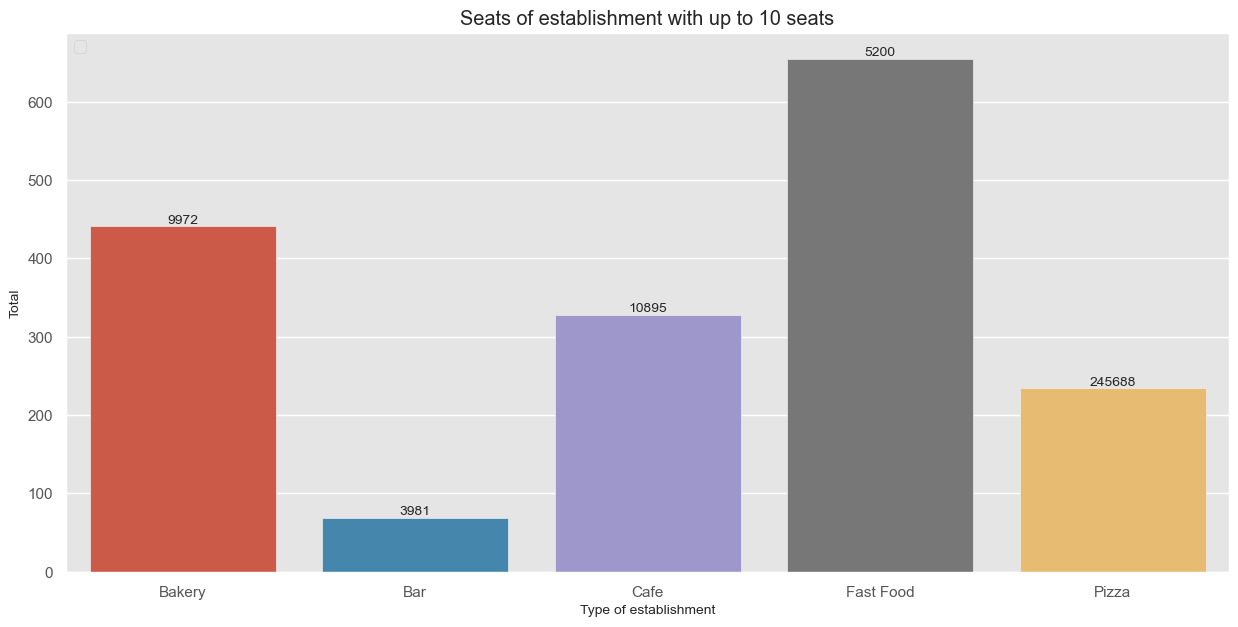

In [151]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_new_intermedio111, x='object_type', y= 'num')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Type of establishment")
ax.set_ylabel("Total")
plt.title("Seats of establishment with up to 10 seats") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')
ax.bar_label(ax.containers[0], labels=df_neww['number'])

plt.show()
ax.figure.savefig('Establishments_with_up_to_10_seats1.png')

In [152]:
data_query2 = df_aparte[( df_aparte['number'] > 10) & (df_aparte['number'] <= 30)]
data_query2

,id,object_name,address,chain,object_type,number
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
34,11820,MUSH BAKERY,5224 W SUNSET BLVD,True,Bakery,15
...,...,...,...,...,...,...
9601,21387,LENNY'S DELI,2379 WESTWOOD BLVD,True,Restaurant,24
9605,21391,YAMAKASE,11901 SANTA MONICA BLVD # 111,True,Restaurant,22
9618,21404,JUCUAPA RESTAURANT,2814 JAMES WOOD BLVD,True,Restaurant,19
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [153]:
df_new_intermedio2 = pd.DataFrame()
df_new_intermedio2['num'] = data_query2.groupby('object_type')['number'].count() 
df_new_intermedio2.mean()

num    242.5
dtype: float64

In [154]:
df_new_intermedio22 = pd.DataFrame()
df_new_intermedio22['num'] = data_query2.groupby('object_type')['number'].sum() 
df_new_intermedio22 # 4822 average seats 

,num
object_type,
Bakery,3246
Bar,690
Cafe,2367
Fast Food,5006
Pizza,1500
Restaurant,16128


In [155]:
df_new_intermedio22 = df_new_intermedio22.drop( df_new_intermedio22[df_new_intermedio22.num > 16127].index)
df_new_intermedio22 

,num
object_type,
Bakery,3246
Bar,690
Cafe,2367
Fast Food,5006
Pizza,1500


In [156]:
df_new_intermedio22.mean()  # 2561.8 seats after removing restaurants 

num    2561.8
dtype: float64

In [157]:
df_new_intermedio22 = pd.DataFrame(df_new_intermedio22.to_records())
df_new_intermedio22

,object_type,num
0,Bakery,3246
1,Bar,690
2,Cafe,2367
3,Fast Food,5006
4,Pizza,1500


In [158]:
df_new_intermedio22.columns

Index(['object_type', 'num'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


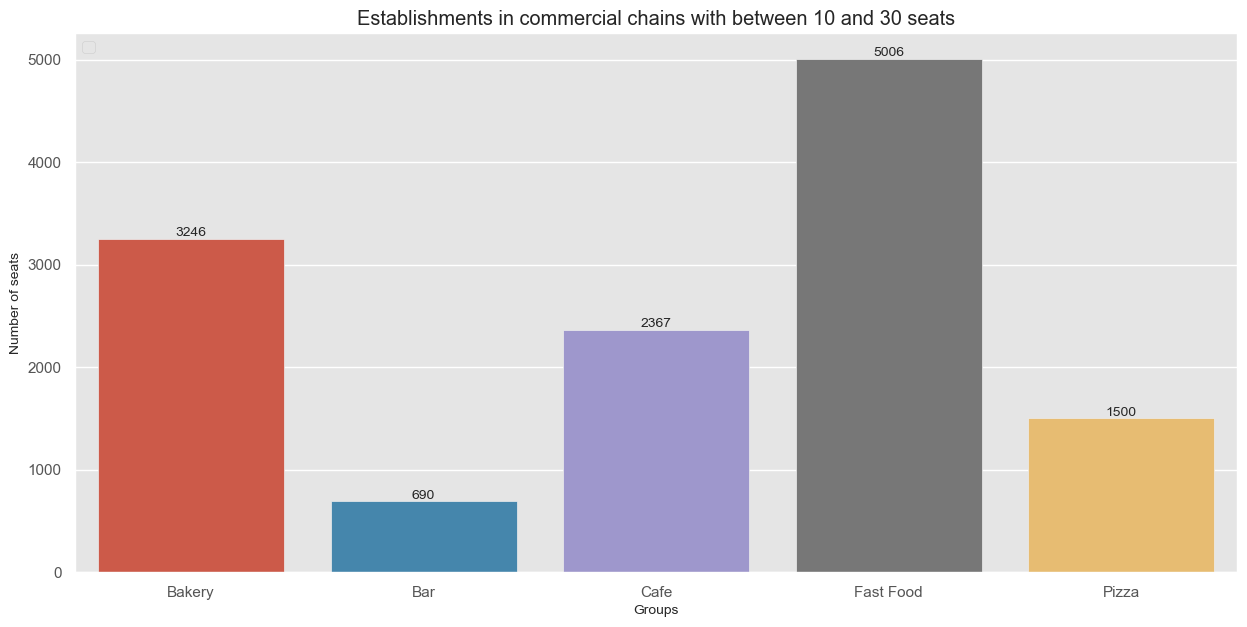

In [159]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_new_intermedio22, x='object_type', y= 'num')
ax.set_xlabel("Groups")
ax.set_ylabel("Number of seats")
plt.title("Establishments in commercial chains with between 10 and 30 seats") 
plt.rcParams['figure.figsize'] = [14, 8]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(['246','247','248'])   
plt.legend(loc='upper left')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()  
ax.figure.savefig('barplot_establishments_in_chain_10_30seats.png')

In [160]:
data_query3 = df_aparte[(df_aparte['number'] > 30)]
data_query3

,id,object_name,address,chain,object_type,number
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118
...,...,...,...,...,...,...
9578,21364,IRENE'S RESTAURANT,2215 S CENTRAL AVE,True,Restaurant,35
9595,21381,STICKY RICE ECHO PARK,1801 SUNSET BLVD,True,Restaurant,44
9621,21407,RED ROCK,11301 W OLYMPIC BLVD # 210,True,Restaurant,41
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47


In [161]:
df_new_intermedio3 = pd.DataFrame()
df_new_intermedio3['num'] = data_query3.groupby('object_type')['number'].count() 
df_new_intermedio3.mean() 

num    252.5
dtype: float64

In [162]:
df_new_intermedio33 = pd.DataFrame()
df_new_intermedio33['num'] = data_query3.groupby('object_type')['number'].sum() 
df_new_intermedio33 # 18868 average seats

,num
object_type,
Bakery,2475
Bar,2341
Cafe,4199
Fast Food,17383
Pizza,2172
Restaurant,84642


In [163]:
df_new_intermedio33 = df_new_intermedio33.drop( df_new_intermedio33[df_new_intermedio33.num > 84641].index)
df_new_intermedio33 # 5714 average seats after remove restaurants

,num
object_type,
Bakery,2475
Bar,2341
Cafe,4199
Fast Food,17383
Pizza,2172


In [164]:
df_new_intermedio33.mean()

num    5714.0
dtype: float64

In [165]:
df_new_intermedio33 = pd.DataFrame(df_new_intermedio33.to_records())
df_new_intermedio33

,object_type,num
0,Bakery,2475
1,Bar,2341
2,Cafe,4199
3,Fast Food,17383
4,Pizza,2172


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


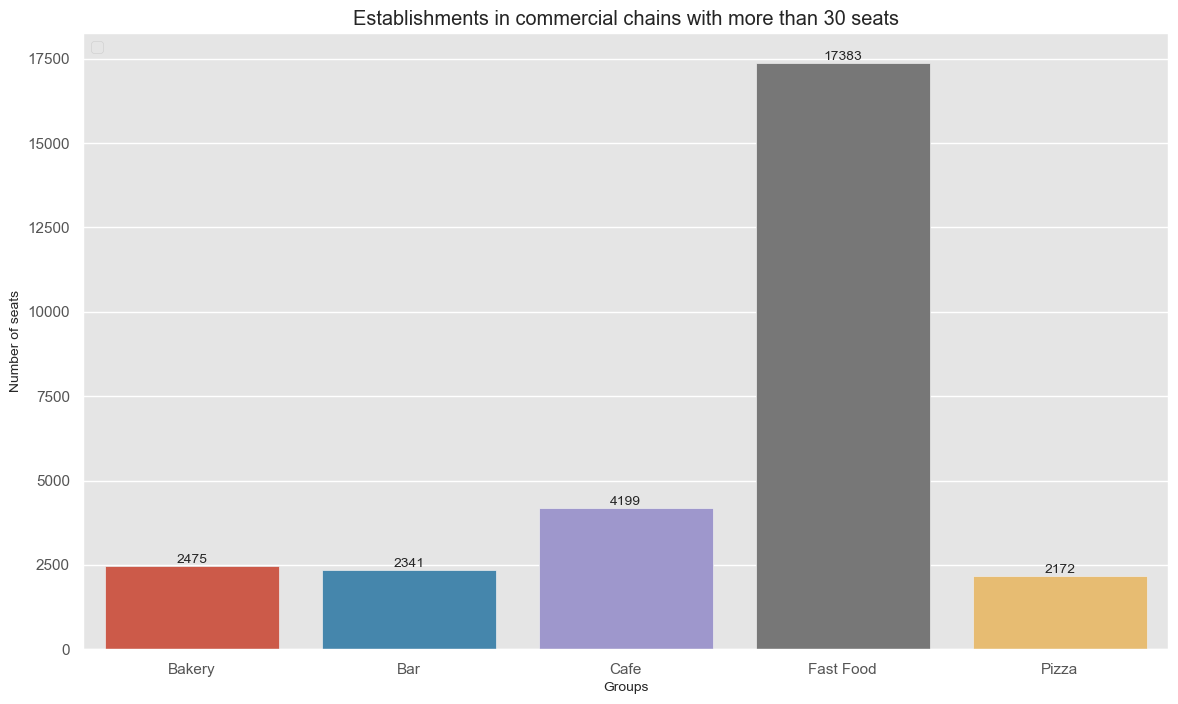

In [166]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_new_intermedio33, x='object_type', y= 'num')
ax.set_xlabel("Groups")
ax.set_ylabel("Number of seats")
plt.title("Establishments in commercial chains with more than 30 seats") 
plt.rcParams['figure.figsize'] = [14, 8]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(['246','247','248'])   
plt.legend(loc='upper left')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()  
ax.figure.savefig('barplot_establishments_in_chain_more_than_30seats.png')

Conclusion of this part: To characterize the commercial chains, a classification was adopted taking into account the number of seats divided into 3 categories, namely: small establishments (up to 10 seats), medium establishments or with a moderate number (between 10 to 30 seats), large establishments (number of seats greater than 30).

The result was that restaurant-type establishments predominate in the 3 categories.

Based on the classification adopted and except for the fact that restaurants predominate in all categories, for the rest of the establishments, it is considered that they are generally characterized by a moderate quantity (10 to 30), since it was observed that this quantity is distributed more homogeneously or uniformly between these types of establishments.

To explore the difference between the groups of establishments that belong to commercial chains between the different categories adopted and observing that restaurants predominate in all categories, we proceed to remove the value of the restaurants in each category in order to obtain a more value homogeneous in the average number of seats in each group, obtaining:

Group-1 up to 10 seats
-117.6 establishments
-627 average seats with restaurants
-345.4 average seats without restaurants

Group-2 10 to 30 seats
-242 establishments
-4822 average seats with restaurants
-2561.8 average seats without restaurants

Group-3 with more than 30 seats
-252.5 establishments
-18868 average number of seats with restaurants
-5714 average seats without restaurants

It is observed that the smallest of the groups has 345.4 seats on average without restaurants. The figure of 345.4 seats is considered a large number of seats for an establishment.

In conclusion: establishments in commercial chains are characterized by having many seats, and on a global average they have 43.7 seats

In [172]:
df_new = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True) & (df_restaurants_us['object_type']=='Restaurant')
df_only_restaurant_CC = df_restaurants_us[mis_booleans]
valor= df_only_restaurant_CC['number'].mean()
valor

44.85602094240838

In [173]:
df_new = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False) & (df_restaurants_us['object_type']=='Restaurant')
df_only_restaurant_CC = df_restaurants_us[mis_booleans]
valor= df_only_restaurant_CC['number'].mean()
valor

49.523886313243295

On average there are 44.8 seats per restaurant associated with CC and 50 seats per restaurant not associated with CC.

In [184]:
data_query4 = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == True) & (df_restaurants_us['object_type'] == 'Restaurant')
data_query4 = df_restaurants_us[mis_booleans] 
data_query4

,id,object_name,address,chain,object_type,number
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
...,...,...,...,...,...,...
9608,21394,GO GET EM TIGER,230 N LARCHMONT BLVD,True,Restaurant,5
9618,21404,JUCUAPA RESTAURANT,2814 JAMES WOOD BLVD,True,Restaurant,19
9621,21407,RED ROCK,11301 W OLYMPIC BLVD # 210,True,Restaurant,41
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47


In [186]:
data_query4.sort_values('number').groupby('object_type').tail(1)

,id,object_name,address,chain,object_type,number
594,12380,KABUKI JAPANESE RESTAURANT,1545 N VINE ST,True,Restaurant,229


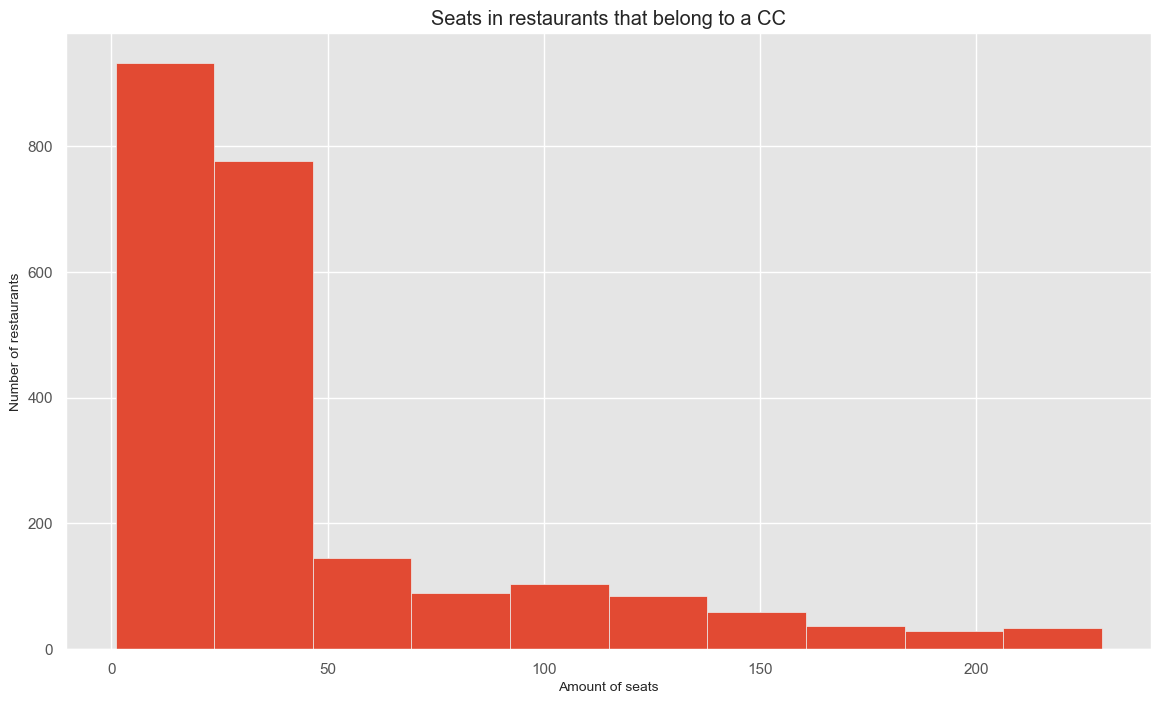

In [188]:
plt.style.use('ggplot')
ax = data_query4['number'].hist(bins=10)
plt.title('Seats in restaurants that belong to a CC')
ax.set_xlabel("Amount of seats")
ax.set_ylabel("Number of restaurants")
plt.show()
ax.figure.savefig('Seats_in_restaurants_belong_to_CC_okeyy.png')

In [248]:
data_query4_temp.sort_values(by='number', ascending=False).head(20)

,object_name,number
594,KABUKI JAPANESE RESTAURANT,229
7383,MANNA KOREAN BBQ,229
475,MOUNTAINGATE COUNTRY CLUB,229
5478,CHUCK E CHEESE'S #397,228
457,USC MAIN KITCHEN-BASEMENT,227
1064,CHOSUN GALBEE RESTAURANT,226
1612,CALIFORNIA CLUB-MAIN KITCHEN,225
1928,LA FONDA RESTAURANT,225
122,TRASTEVERE RESTAURANT,224
9438,MEZZO GARDEN RESTAURANT,222


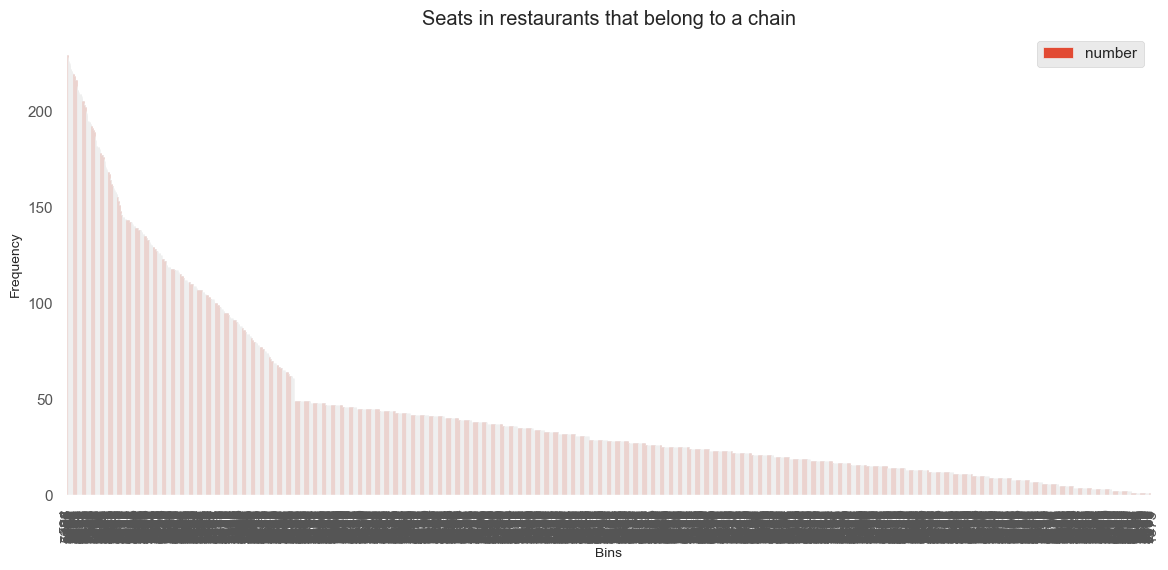

In [247]:
plt.style.use('ggplot')
plt.style.use('ggplot')
data_query4_temp = data_query4[['object_name', 'number']]
data_query4_temp.sort_values(by='number', ascending=False).plot(kind="bar",figsize=(14, 6))
plt.title('Seats in restaurants that belong to a chain')
plt.ylabel('Frequency')
plt.xlabel('Bins')
plt.legend(loc='upper right')

In [192]:
data_query5 = pd.DataFrame()
mis_booleans= (df_restaurants_us['chain'] == False) & (df_restaurants_us['object_type'] == 'Restaurant')
data_query5 = df_restaurants_us[mis_booleans] 
data_query5

,id,object_name,address,chain,object_type,number
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
...,...,...,...,...,...,...
9642,21428,TOLOSA,2635 WHITTIER BLVD,False,Restaurant,19
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122


In [193]:
# Hallando restaurante con menor número de asientos
data_query5.sort_values('number').groupby('object_type').tail(1)

,id,object_name,address,chain,object_type,number
3277,15063,AMERICAN JEWISH UNIVERSITY,15600 MULHOOLAND DR,False,Restaurant,229


In [195]:
data_query5_reduced= data_query5.drop(['object_name', 'address', 'chain'], axis=1)
data_query5_reduced= data_query5_reduced.drop(['object_type'], axis=1)
data_query5_reduced= data_query5_reduced.drop(['id'], axis=1)
data_query5_reduced = data_query5_reduced.reset_index()
data_query5_reduced

,index,number
0,1,9
1,3,22
2,4,20
3,5,14
4,6,100
...,...,...
4956,9642,19
4957,9643,25
4958,9645,225
4959,9646,122


In [196]:
data_query5_reduced['number'].max()
data_query5_reduced['number'].min()

1

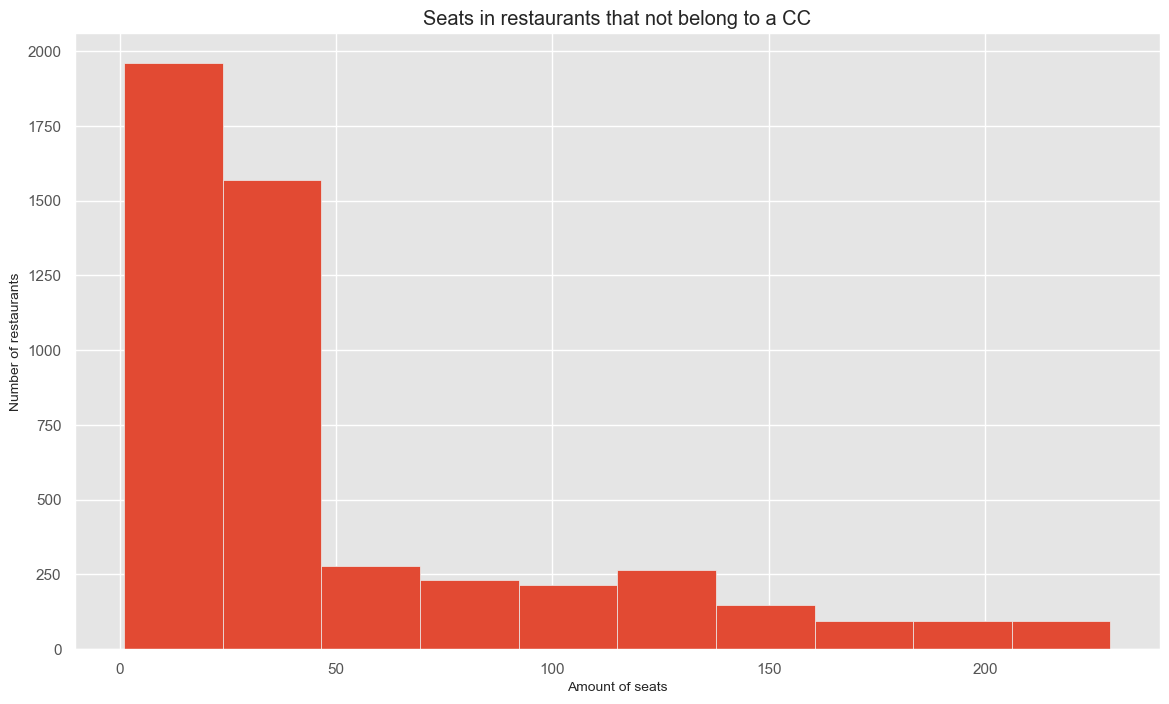

In [197]:
plt.style.use('ggplot')
ax = data_query5['number'].hist(bins=10)
plt.title('Seats in restaurants that not belong to a CC')
ax.set_xlabel("Amount of seats")
ax.set_ylabel("Number of restaurants")
plt.show()
ax.figure.savefig('Seats_in_restaurants_not_belong_to_CC.png')

### CONCLUSION:

On average there are 44.8 seats per restaurant associated with CC and 50 seats per restaurant not associated with CC.

It was found that among the restaurants not associated with CC there are 6 with the same maximum number of seats of 229, on the other hand, among the restaurants associated with CC, it was found that there are 3 with the same maximum number of seats of 229, therefore the Maximum number of seats is shared between restaurants of both groups associated with CC and those that are not.

In [201]:
df_restaurants_us.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [202]:
df_restaurants_us.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [203]:
# Place the street name data from the address column in a separate column.

df_restaurants_us['address_zip_code'] = df_restaurants_us['address'].str.extract(r"\b(\d{4})\b")
df_restaurants_us['address_zip_code'] 

0       3708
1        NaN
2       6801
3       1814
4       2100
        ... 
9646     NaN
9647    5750
9648    6741
9649     NaN
9650    1300
Name: address_zip_code, Length: 9648, dtype: object

In [204]:
df_restaurants_us.head(10)

,id,object_name,address,chain,object_type,number,address_zip_code
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,NaN
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NaN
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,NaN
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,3500
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,3027
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,3707


In [205]:
df_restaurants_us['address_number'] = df_restaurants_us['address'].str.extract(r'(?P<StreetNo>\d{,5})')
df_restaurants_us['address_number']

0       3708
1        100
2       6801
3       1814
4       2100
        ... 
9646     217
9647    5750
9648    6741
9649     548
9650    1300
Name: address_number, Length: 9648, dtype: object

In [206]:
data_query6 = pd.DataFrame()
pat = r'^(?P<number>\d+)?(?P<street>.+(?=\bapt|\bunit)|.+(?=#)|.+)(?P<apt_unit>(?:\bapt|\bunit|#).+)?'

data_query6 = df_restaurants_us.address.str.extract(pat)

In [207]:
data_query6

,number,street,apt_unit
0,3708,N EAGLE ROCK BLVD,NaN
1,100,WORLD WAY,# 120
2,6801,HOLLYWOOD BLVD,# 253
3,1814,W SUNSET BLVD,NaN
4,2100,ECHO PARK AVE,NaN
...,...,...,...
9646,217,W TEMPLE AVE,NaN
9647,5750,MELROSE AVE,NaN
9648,6741,HOLLYWOOD BLVD,NaN
9649,548,S SPRING ST STE 100,NaN


In [208]:
data_query6.columns

Index(['number', 'street', 'apt_unit'], dtype='object')

In [209]:
data_query6 =  data_query6.rename(columns={'number': 'address_number', 'street': 'street', 'apt_unit': 'apt_unit'})
data_query6

,address_number,street,apt_unit
0,3708,N EAGLE ROCK BLVD,NaN
1,100,WORLD WAY,# 120
2,6801,HOLLYWOOD BLVD,# 253
3,1814,W SUNSET BLVD,NaN
4,2100,ECHO PARK AVE,NaN
...,...,...,...
9646,217,W TEMPLE AVE,NaN
9647,5750,MELROSE AVE,NaN
9648,6741,HOLLYWOOD BLVD,NaN
9649,548,S SPRING ST STE 100,NaN


In [210]:
data_query6 = data_query6.drop('apt_unit', axis=1)

In [211]:
data_query6.columns

Index(['address_number', 'street'], dtype='object')

In [212]:
data_query6.isna().sum()

address_number    8
street            0
dtype: int64

In [213]:
data_query6= data_query6.dropna()

In [214]:
data_query6.isna().sum()

address_number    0
street            0
dtype: int64

In [215]:
data_query6

,address_number,street
0,3708,N EAGLE ROCK BLVD
1,100,WORLD WAY
2,6801,HOLLYWOOD BLVD
3,1814,W SUNSET BLVD
4,2100,ECHO PARK AVE
...,...,...
9646,217,W TEMPLE AVE
9647,5750,MELROSE AVE
9648,6741,HOLLYWOOD BLVD
9649,548,S SPRING ST STE 100


In [216]:
df_restaurants_us

,id,object_name,address,chain,object_type,number,address_zip_code,address_number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708,3708
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,NaN,100
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801,6801
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,1814
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,2100
...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,NaN,217
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,5750
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,6741,6741
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,NaN,548


In [217]:
df_restaurants_us.isna().sum()

id                     0
object_name            0
address                0
chain                  0
object_type            0
number                 0
address_zip_code    3345
address_number         0
dtype: int64

In [218]:
df_restaurants_us = df_restaurants_us.drop('address_zip_code', axis=1)

In [219]:
df_restaurants_us.isna().sum()

id                0
object_name       0
address           0
chain             0
object_type       0
number            0
address_number    0
dtype: int64

### note Several of the columns, including address zip code, were eliminated as they are not required for what is requested.

In [220]:
df_restaurants_us_merging_all = df_restaurants_us.join(data_query6, lsuffix="_right")

In [221]:
#The best street is understood to be the one that has the greatest number of restaurants, which does not mean that they have 
#the greatest number of seats or diners.

df_restaurants_us_merging_all 

,id,object_name,address,chain,object_type,number,address_number_right,address_number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708,3708,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100,100,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801,6801,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,1814,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,2100,ECHO PARK AVE
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217,217,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,5750,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,6741,6741,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,548,548,S SPRING ST STE 100


In [222]:
# The best street is understood to be the one that has the greatest number of restaurants, which does not mean that they have 
#the greatest number of seats or diners.

# Columns I'm interested in: street, object_type, id
# I order last and keep only the top 10

In [223]:
df_restaurants_us_merging_all.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number',
       'address_number_right', 'address_number', 'street'],
      dtype='object')

In [224]:
df_restaurants_us_merging_all_reduced =  df_restaurants_us_merging_all.drop(['object_name', 'address', 'chain', 
       'address_number_right', 'address_number','number'], axis=1)

In [225]:
# Leaving just streets with restaurants 

df_restaurants_us_merging_all_reduced = df_restaurants_us_merging_all_reduced[df_restaurants_us_merging_all_reduced['object_type'] == 'Restaurant']
df_restaurants_us_merging_all_reduced

,id,object_type,street
1,11787,Restaurant,WORLD WAY
3,11789,Restaurant,W SUNSET BLVD
4,11790,Restaurant,ECHO PARK AVE
5,11791,Restaurant,NATIONAL BLVD
6,11792,Restaurant,WORLD WAY
...,...,...,...
9643,21429,Restaurant,S LOS ANGELES ST
9645,21431,Restaurant,SANTA MONICA BLVD
9646,21432,Restaurant,W TEMPLE AVE
9647,21433,Restaurant,MELROSE AVE


In [226]:
df_restaurants_us_merging_all_reduced

,id,object_type,street
1,11787,Restaurant,WORLD WAY
3,11789,Restaurant,W SUNSET BLVD
4,11790,Restaurant,ECHO PARK AVE
5,11791,Restaurant,NATIONAL BLVD
6,11792,Restaurant,WORLD WAY
...,...,...,...
9643,21429,Restaurant,S LOS ANGELES ST
9645,21431,Restaurant,SANTA MONICA BLVD
9646,21432,Restaurant,W TEMPLE AVE
9647,21433,Restaurant,MELROSE AVE


In [227]:
dfulti = df_restaurants_us_merging_all_reduced.groupby('street')['id'].count().reset_index()
dfulti

,street,id
0,1/2 3RD ST,1
1,1/2 BEVERLY BLVD,3
2,1/2 COLORADO BLVD,1
3,1/2 E 1ST ST,6
4,1/2 E 2ND ST,1
...,...,...
1748,YUCCA ST,2
1749,Z00 DR,1
1750,ZONAL AVE,1
1751,ZOO DR,1


In [229]:
dfulti_sorted_10first = dfulti.sort_values(by='id', ascending=False).head(10)
dfulti_sorted_10first

,street,id
1544,W PICO BLVD,218
1566,W SUNSET BLVD,217
422,HOLLYWOOD BLVD,136
1647,WILSHIRE BLVD,131
1310,W 3RD ST,119
1182,SANTA MONICA BLVD,107
1505,W OLYMPIC BLVD,107
1089,S VERMONT AVE,107
528,MELROSE AVE,106
119,BEVERLY BLVD,103


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


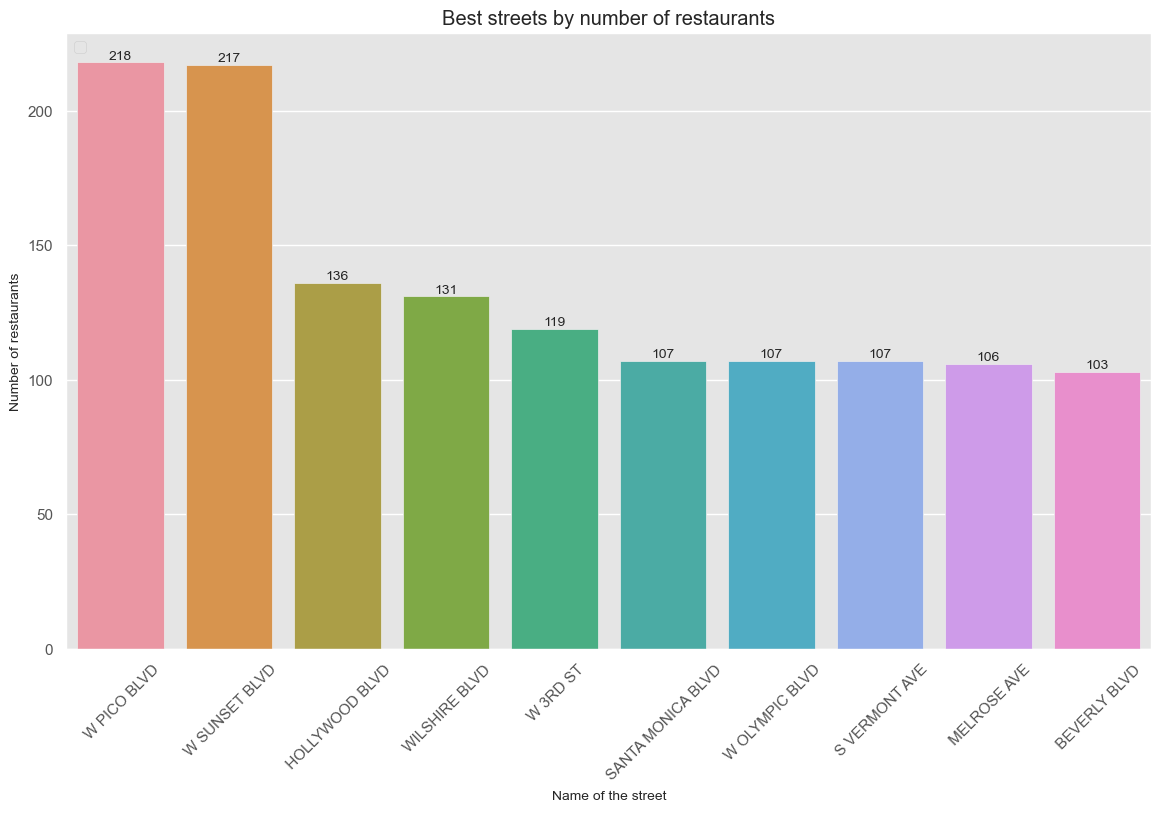

In [233]:
plt.style.use('ggplot')
ax = sns.barplot(data = dfulti_sorted_10first, x='street', y= 'id')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
ax.set_xlabel("Name of the street")
ax.set_ylabel("Number of restaurants")
plt.title("Best streets by number of restaurants") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')
ax.bar_label(ax.containers[0], labels=dfulti_sorted_10first['id'])

plt.show()
ax.figure.savefig('barplot_Best_streets_by_number_restaurants-Okeyyy.png')

From the previous graph you can see that the first 10 streets or avenues with the highest number of restaurants are W SUNSET BLVD with 217 and W PICO BLVD with 218, respectively.

In [235]:
# Finding the number of streets that only have one restaurant

dfulti_sorted = pd.DataFrame()
dfulti_sorted = dfulti.sort_values(by='id', ascending=False).reset_index()
dfulti_sorted

,index,street,id
0,1544,W PICO BLVD,218
1,1566,W SUNSET BLVD,217
2,422,HOLLYWOOD BLVD,136
3,1647,WILSHIRE BLVD,131
4,1310,W 3RD ST,119
...,...,...,...
1748,722,N WESTERN BLVD,1
1749,721,N WESTERN AVE STE 7,1
1750,720,N WESTERN AVE STE 6,1
1751,719,N WESTERN AVE STE 111,1


In [236]:
dfulti_sorted.columns

Index(['index', 'street', 'id'], dtype='object')

In [237]:
dfulti_sorted_only_one_place = dfulti_sorted[dfulti_sorted['id'] == 1]
dfulti_sorted_only_one_place

,index,street,id
555,1697,WILSHIRE BLVD STE A-1,1
556,1223,SAWTELLE BLVD STE 200,1
557,1698,WILSHIRE BLVD STE A11,1
558,1222,SAWTELLE BLVD STE 110,1
559,1224,SAWTLLE BLVD,1
...,...,...,...
1748,722,N WESTERN BLVD,1
1749,721,N WESTERN AVE STE 7,1
1750,720,N WESTERN AVE STE 6,1
1751,719,N WESTERN AVE STE 111,1


In [238]:
dfulti_sorted_only_one_place['id'].count()

1198

After the previous count, there are 1198 streets that only have one restaurant.

### For streets with many restaurants, analyze the distribution of the number of seats.

In [240]:
df_restaurants_us_merging_all

,id,object_name,address,chain,object_type,number,address_number_right,address_number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708,3708,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100,100,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801,6801,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,1814,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,2100,ECHO PARK AVE
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217,217,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,5750,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,6741,6741,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,548,548,S SPRING ST STE 100


In [241]:
#Steps
#For streets with many restaurants, analyze the distribution of the number of seats.
#Columns I'm interested in: street, object_type, id, number
#I order last and I'm only left with the first 10

df_restaurants_us_merging_all_reduced2 =  df_restaurants_us_merging_all.drop(['object_name', 'address', 'chain', 
       'address_number_right', 'address_number'], axis=1)

df_restaurants_us_merging_all_reduced2

,id,object_type,number,street
0,11786,Cafe,26,N EAGLE ROCK BLVD
1,11787,Restaurant,9,WORLD WAY
2,11788,Fast Food,20,HOLLYWOOD BLVD
3,11789,Restaurant,22,W SUNSET BLVD
4,11790,Restaurant,20,ECHO PARK AVE
...,...,...,...,...
9646,21432,Restaurant,122,W TEMPLE AVE
9647,21433,Restaurant,93,MELROSE AVE
9648,21434,Fast Food,15,HOLLYWOOD BLVD
9649,21435,Cafe,6,S SPRING ST STE 100


In [242]:
# Leaving only those streets with restaurants

df_rests_us_merged_only = df_restaurants_us_merging_all_reduced2[df_restaurants_us_merging_all_reduced2['object_type'] == 'Restaurant']
df_rests_us_merged_only

,id,object_type,number,street
1,11787,Restaurant,9,WORLD WAY
3,11789,Restaurant,22,W SUNSET BLVD
4,11790,Restaurant,20,ECHO PARK AVE
5,11791,Restaurant,14,NATIONAL BLVD
6,11792,Restaurant,100,WORLD WAY
...,...,...,...,...
9643,21429,Restaurant,25,S LOS ANGELES ST
9645,21431,Restaurant,225,SANTA MONICA BLVD
9646,21432,Restaurant,122,W TEMPLE AVE
9647,21433,Restaurant,93,MELROSE AVE


In [243]:
df_top_avenues_most_rest_us = df_rests_us_merged_only.groupby(['street'])['number'].sum().reset_index().sort_values(by='number', ascending=False).head(20)
df_top_avenues_most_rest_us 

,street,number
1566,W SUNSET BLVD,12088
1544,W PICO BLVD,9857
1647,WILSHIRE BLVD,8786
422,HOLLYWOOD BLVD,7948
1505,W OLYMPIC BLVD,6382
528,MELROSE AVE,5853
1310,W 3RD ST,5671
119,BEVERLY BLVD,5343
875,S FIGUEROA ST,5316
1089,S VERMONT AVE,5119


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


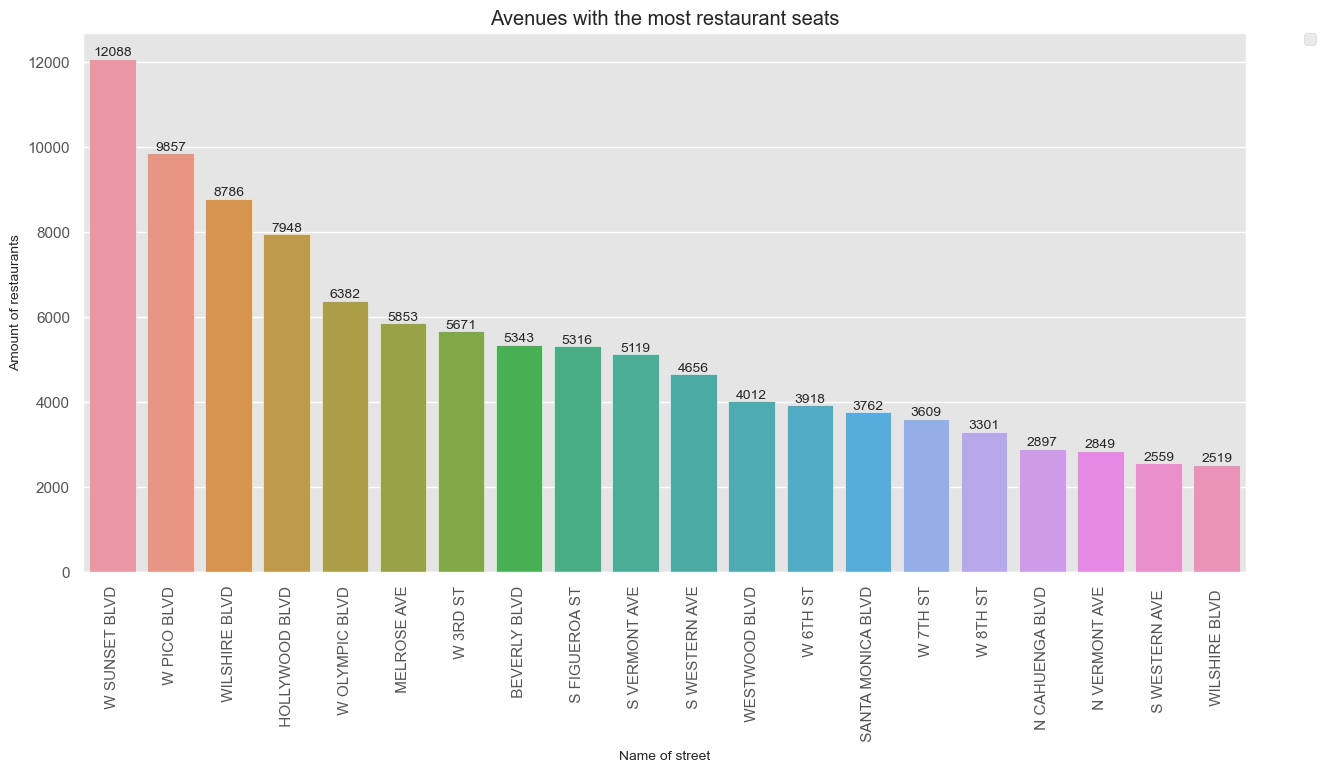

In [245]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_top_avenues_most_rest_us, x='street', y= 'number')
ax.set_xlabel("Name of street")
ax.set_ylabel("Amount of restaurants")
ax.tick_params(axis='x', rotation=90)
plt.title("Avenues with the most restaurant seats") 
plt.rcParams['figure.figsize'] = [15, 8]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()  
ax.figure.savefig('barplot_avenues_most_restaurant_seats.png')

From the previous graph, it can be seen that in the list of the top 20 avenues with the largest number of seats for diners are W SUNSET BLVD and W PICO BLVD, which concentrate the largest number of restaurants, and it can also be seen that in the rest of the subsequent avenues the number of establishments gradually decreases.

In [717]:
# Taking a closer look at the data from the top 20 avenues with the most restaurant seats

df_rests_us_merged_only_full_table = df_restaurants_us_merging_all[df_restaurants_us_merging_all['object_type'] == 'Restaurant']
df_rests_us_merged_only_full_table

,id,object_name,address,chain,object_type,number,address_number_right,address_number,street
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100,100,WORLD WAY
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814,1814,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100,2100,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,10004,10004,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,100,100,WORLD WAY
...,...,...,...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25,601,601,S LOS ANGELES ST
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225,10250,10250,SANTA MONICA BLVD
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217,217,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750,5750,MELROSE AVE


In [720]:
df_top_avenues_most_rest_us1 = df_rests_us_merged_only_full_table.groupby(['street', 'chain'])['number'].sum().reset_index().sort_values(by='number', ascending=False).head(20)
df_top_avenues_most_rest_us1

,street,chain,number
1891,W SUNSET BLVD,False,8899
1862,W PICO BLVD,False,7263
1990,WILSHIRE BLVD,False,6358
514,HOLLYWOOD BLVD,False,5829
639,MELROSE AVE,False,4828
1581,W 3RD ST,False,4427
139,BEVERLY BLVD,False,4314
1815,W OLYMPIC BLVD,False,4209
1067,S FIGUEROA ST,False,4140
1355,S WESTERN AVE,False,3356


When analyzing a little more closely the data of the top 20 avenues with the highest number of seats in restaurants, it can be seen that there are only 3 avenues with restaurants that belong to CC, the rest of the establishments do not have this condition, which could be indicative that these establishments are more successful as they are not associated with commercial chains, however, other factors would have to be analyzed such as the geographical area of these avenues, the population density of those areas, characterizing the public that visits those avenues with high density of these establishments, among other elements, all of which contributes to a better understanding of the dynamics of customer flow on these avenues.

### Conclusions obtained

1. After analyzing the data, it was observed that the largest proportion belongs to Restaurant type establishments, therefore they are the ones that predominate in the area.

2. It was obtained that of the group of types of establishments that belong to CC, the Restaurant type has 2,292 units and corresponds to 62.3% of the total, however, of the grand total of establishments they represent 23.7%.

3. In the characterization of CC establishments by seats, it was obtained that each establishment has an average of 39.69 seats, then an affordable amount is considered for this type of establishment and the gastronomic activity carried out in a restaurant.

4. The restaurants associated with CC and those that were not were explored in terms of their number of seats, it was found that on average there are 44.8 seats per restaurant associated with CC and 50 seats per restaurant not associated with CC, that is, the associated restaurant CC has more diners, which could be associated with the fact that being a commercial chain, there are other places within the nearby center that customers visit, which makes the place more attractive in general and therefore more customers flow in. restaurants, however, more data would be needed.

5. It was found that among the restaurants not associated with CC there are 6 with the same maximum number of seats of 229, on the other hand, among the restaurants associated with CC, it was found that there are 3 with the same maximum number of seats of 229, therefore Therefore, the maximum number of seats is shared between restaurants of both groups associated with CC and those that are not.

6. It was possible to verify the list of the first 10 streets or avenues with the greatest number of restaurants, these being W SUNSET BLVD with 217 and W PICO BLVD with 218, respectively.

7. The list of the top 20 avenues with the largest number of seats for diners was built, finding W SUNSET BLVD and W PICO BLVD, which concentrate the largest number of restaurants.

As a summary:

-There is a tendency for establishments not to be affiliated with CC.

-In general sense, establishments have 40 seats on average.

-The CC commercial chains concentrate a significant number of restaurants and number of diners and taking into account that associated with the CCs other businesses or services could be integrated that result in a more comprehensive and attractive product for the customer that further enhances the influx of clients, it is recommended to develop a CC.

Recommendation

-It is recommended to continue studying the establishments in the area to have a better idea of the competition.

-In addition, it is recommended to characterize the clientele that visits these places, in order to understand a little more what factors attract them most to these places, in order to segment the market.

-It is recommended to carry out a survey of the state of customer opinion based on surveys and several samples of customers at different times of the day of those regular customers at restaurants with the highest occupancy rate, mainly in restaurants that are not associated with CC.